# Check the data

In [4]:
from pyhamrds import bhoss
import os

#datadir = '/ccs/home/astrodoo/MEMW/BHOSS/BHOSS_CODE/outcomes/C3D2R512'
#data = 'GRRT_IMAGE_bhoss_data80.dat'

datadir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_SA93/Rh1/inc90/BHOSS_CODE"
data = "Rhigh_1_incl_90_IMAGE_GRMHD_HAMR3D_SANEA93_100.dat"
#data = "Rh40_Rl1_sig1_i10_ph0_SgrA_Th_IMAGE_GRMHD_HAMR3D_SANEA93M_132.dat"
#datadir = "/lustre04/scratch/astrodoo/BHOSS_EHT_old/BHOSS_CODE"

bhdata = bhoss.read_image(os.path.join(datadir,data),silent=False,ifreq=2)  # Koushik's data - only 230GHz

===================================== header ==================================
width: 20.134000 Rg, offset: 0.000000 Rg, resolution: 400, Number of obs. freqs: 5
time: 9054.201523 Rg/c, inclination: 90.000000 deg, phi: 0.000000 deg, BH spin: 0.937500
Luminosity correction: 4.762071e+22, Jansky correction: 6.025933e-01, Micro Arcsecond correction: 5.029644e+00
Frequencies of intereset [GHz]: [  43.   86.  230.  345. 1360.]
All-freq image is included (3rd column in image data): False
length of data: 480000
xmin: -101.266842, xmax: 101.266842, ymin: -101.266842, ymax: 101.266842
intensity (min,max)= 3.67558e-07 0.000684388
Total flux = 2.015427 Jy at 230 GHz


===================================== header ==================================
width: 20.134000 Rg, offset: 0.000000 Rg, resolution: 400, Number of obs. freqs: 81
time: 9497.623989 Rg/c, inclination: 90.000000 deg, phi: 0.000000 deg, BH spin: 0.937500
Luminosity correction: 4.762071e+22, Jansky correction: 6.025933e-01, Micro Arcsecond correction: 5.029644e+00
Frequencies of intereset [GHz]: [230.]
All-freq image is included (3rd column in image data): False
N_obs_freqs (81) is different from the exact number of the selelcted frequencies (1): check obs_freqs!
N_obs_freqs is now overlaid to len(obs_freqs)
480000
-101.26684243394799 101.26684243394799 -101.26684243394799 101.26684243394799
(zmin,zmax)= 9.41275e-08 0.00360312
Total flux = 2.002618 Jy at 230 GHz
165:41:02.382 - Start Program


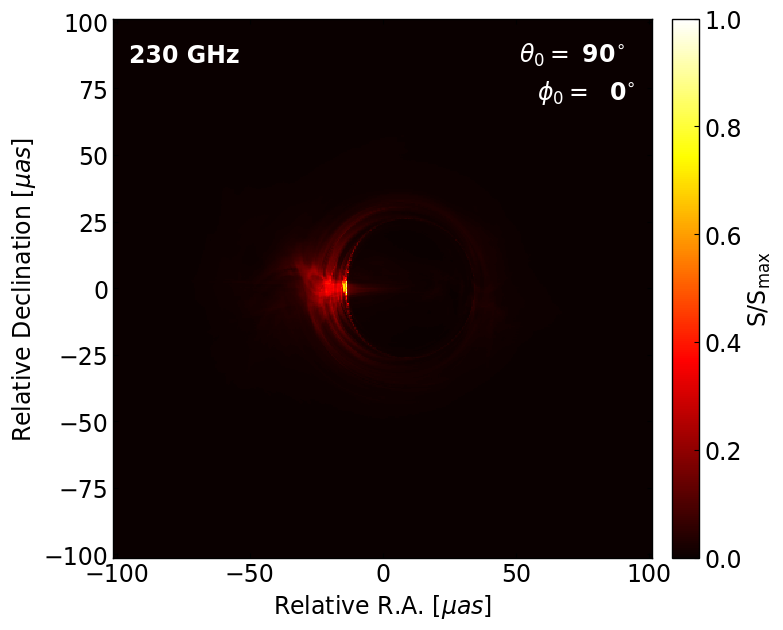

In [16]:
from pyhamrds import bhoss
import matplotlib.pyplot as plt
import os
%matplotlib inline

#datadir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/Rh1/inc10/BHOSS_CODE"
#data = "Rh1_Rl1_sig1_i10_ph0_SgrA_Th_IMAGE_GRMHD_HAMR3D_EHT_MADS41A5_331.dat"

filename  = os.path.join(datadir, data)

figdir = os.environ['PYTHONFIG']
#bhoss.show_image(filename,ifreq=10,cmap='hot',out=os.path.join(figdir,'bhoss_img_David512_201.png'))
bhoss.show_image(filename,ifreq=0,cmap='hot') # Koushik's data - only 230GHz

# Check Average Flux

In [5]:
import os
import numpy as np

#find average flux
def bhoss_avg(Rhigh,inclination,model_name, ifreq=2):

    if (model_name == "MADS41A5"):
        model_str = "bhoss_MA05"
        ind_start = 311
        ind_end = 410
    elif (model_name == "MADS41A0"):
        model_str = "bhoss_MA0"
        ind_start = 97
        ind_end = 196
    elif (model_name == "MADS41A93"):
        model_str = "bhoss_MA93"
        ind_start = 96
        ind_end = 195
    elif (model_name == "SANEA93M"):
        model_str = "bhoss_SA93M"
        ind_start=132
        ind_end = 231
    elif (model_name == "SANEA93"):
        model_str = "bhoss_SA93"
        ind_start=99
        ind_end = 198
    else:
        print("no model")
        return
    
    if ((Rhigh==1) | (Rhigh==5) | (Rhigh==10) | (Rhigh==40) | (Rhigh==160)):
        Rh_str = "Rh%d"%Rhigh
    else:
        print("no model")
        return
    
    if ((inclination==10) | (inclination==30) | (inclination==50) | (inclination==70) | (inclination==90)):
        inc_str = "inc%d"%inclination
    else:
        print("no model")
        return
    
    basedir = "/lustre04/scratch/astrodoo/BHOSS_EHT"
    workdir = os.path.join(basedir,model_str,Rh_str,inc_str,'BHOSS_CODE')
    print("work directory %s"%workdir)
    os.chdir(workdir)
    
    z_tot=np.zeros((ind_end-ind_start+1))
    time =np.zeros((ind_end-ind_start+1))
    ind  =np.zeros((ind_end-ind_start+1))
    
    file_path = os.getcwd()
    print("ifreq=%d: Should be checked if it is the correct freqency."%ifreq)
    for image_ind in range(ind_start,ind_end+1):
        data_name="Rhigh_%d_incl_%d_IMAGE_GRMHD_HAMR3D_%s_%d.dat" \
        %(Rhigh,inclination,model_name,image_ind)
        filename  = os.path.join(file_path, data_name)
        
        header_1 = np.genfromtxt(filename, max_rows = 1)
        header_2 = np.genfromtxt(filename, skip_header = 1, max_rows = 1)
        header_3 = np.genfromtxt(filename, skip_header = 2, max_rows = 1)
        M           = int(header_1[2])
        Jansky_corr          = header_2[5]
        ascii2 = np.loadtxt(filename, skiprows = 3, usecols = (0, 1, ifreq+2))
        data2=ascii2.reshape([M, M, 3])
        z    = data2[:,:,2]*Jansky_corr #convert to Jansky
        z_tot[image_ind-ind_start]=np.sum(z)
        
        ind[image_ind-ind_start] = image_ind
        time[image_ind-ind_start] = header_2[0]   # time
        
        print("%d, flux: %f at %f"%(image_ind,z_tot[image_ind-ind_start],time[image_ind-ind_start]))
        
    dscale = header_2[7]
    print(model_name+"Rh%d"%Rhigh,"Average total flux =", np.sum(z_tot)/(ind_end-ind_start+1), \
          "Jy; density_scale=", dscale)
    return (ind,time,z_tot,dscale) 

## Rhigh = 1

In [6]:
ind,time,z_tot,dscale = bhoss_avg(1, 10, "SANEA93",ifreq=2)

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_SA93/Rh1/inc10/BHOSS_CODE
ifreq=2: Should be checked if it is the correct freqency.
99, flux: 2.146185 at 9043.128728
100, flux: 2.126337 at 9054.201523
101, flux: 2.111144 at 9063.696043
102, flux: 2.103768 at 9073.192538
103, flux: 2.105657 at 9084.269539
104, flux: 2.103466 at 9093.760862
105, flux: 2.093698 at 9103.246526
106, flux: 2.090656 at 9114.319883
107, flux: 2.093414 at 9123.813554
108, flux: 2.093271 at 9133.307034
109, flux: 2.100886 at 9144.385666
110, flux: 2.104791 at 9153.878107
111, flux: 2.106745 at 9163.373690
112, flux: 2.102637 at 9174.454441
113, flux: 2.088618 at 9183.942361
114, flux: 2.079128 at 9193.435967
115, flux: 2.080487 at 9204.508599
116, flux: 2.074931 at 9213.993390
117, flux: 2.073349 at 9223.488971
118, flux: 2.067335 at 9234.553237
119, flux: 2.051395 at 9244.039795
120, flux: 2.040728 at 9253.531163
121, flux: 2.035242 at 9264.605898
122, flux: 2.034205 at 9274.096017
123, flux: 2.038686

In [7]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_SA93/Rh1/inc10/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [8]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_SA93/Rh1/inc10/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 99/198/100
average z_tot = 2.116492 Jy, the density scale = 8.550000e-19


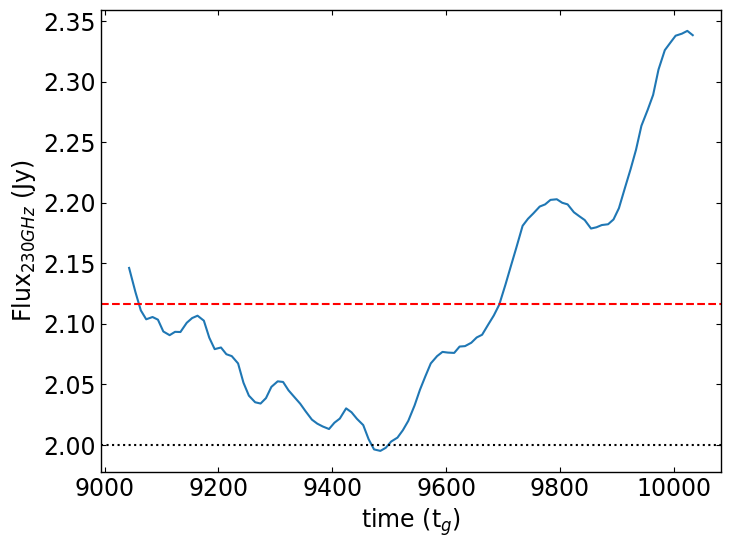

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [10]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

99:: 2.146185 Jy at 9043.128728
100:: 2.126337 Jy at 9054.201523
101:: 2.111144 Jy at 9063.696043
102:: 2.103768 Jy at 9073.192538
103:: 2.105657 Jy at 9084.269539
104:: 2.103466 Jy at 9093.760862
105:: 2.093698 Jy at 9103.246526
106:: 2.090656 Jy at 9114.319883
107:: 2.093414 Jy at 9123.813554
108:: 2.093271 Jy at 9133.307034
109:: 2.100886 Jy at 9144.385666
110:: 2.104791 Jy at 9153.878107
111:: 2.106745 Jy at 9163.373690
112:: 2.102637 Jy at 9174.454441
113:: 2.088618 Jy at 9183.942361
114:: 2.079128 Jy at 9193.435967
115:: 2.080487 Jy at 9204.508599
116:: 2.074931 Jy at 9213.993390
117:: 2.073349 Jy at 9223.488971
118:: 2.067335 Jy at 9234.553237
119:: 2.051395 Jy at 9244.039795
120:: 2.040728 Jy at 9253.531163
121:: 2.035242 Jy at 9264.605898
122:: 2.034205 Jy at 9274.096017
123:: 2.038686 Jy at 9283.585796
124:: 2.047954 Jy at 9293.077161
125:: 2.052543 Jy at 9304.150408
126:: 2.052012 Jy at 9313.640685
127:: 2.045125 Jy at 9323.132694
128:: 2.039137 Jy at 9334.206852
129:: 2.034

In [11]:
ind,time,z_tot,dscale = bhoss_avg(1, 50, "SANEA93",ifreq=2)

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_SA93/Rh1/inc50/BHOSS_CODE
ifreq=2: Should be checked if it is the correct freqency.
99, flux: 2.078474 at 9043.128728
100, flux: 2.059338 at 9054.201523
101, flux: 2.042573 at 9063.696043
102, flux: 2.029420 at 9073.192538
103, flux: 2.017187 at 9084.269539
104, flux: 2.008318 at 9093.760862
105, flux: 1.991053 at 9103.246526
106, flux: 1.991667 at 9114.319883
107, flux: 2.004233 at 9123.813554
108, flux: 2.006472 at 9133.307034
109, flux: 2.009912 at 9144.385666
110, flux: 2.011263 at 9153.878107
111, flux: 2.018618 at 9163.373690
112, flux: 2.031119 at 9174.454441
113, flux: 2.035357 at 9183.942361
114, flux: 2.034174 at 9193.435967
115, flux: 2.040033 at 9204.508599
116, flux: 2.035568 at 9213.993390
117, flux: 2.034181 at 9223.488971
118, flux: 2.034536 at 9234.553237
119, flux: 2.021475 at 9244.039795
120, flux: 2.012026 at 9253.531163
121, flux: 2.005287 at 9264.605898
122, flux: 1.996800 at 9274.096017
123, flux: 1.991949

In [12]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_SA93/Rh1/inc50/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [13]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_SA93/Rh1/inc50/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 99/198/100
average z_tot = 1.984171 Jy, the density scale = 8.000000e-19


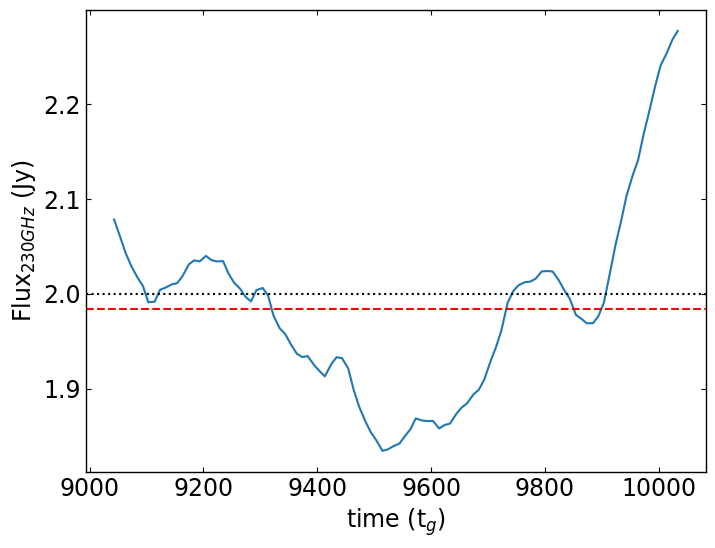

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [15]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

99:: 2.078474 Jy at 9043.128728
100:: 2.059338 Jy at 9054.201523
101:: 2.042573 Jy at 9063.696043
102:: 2.029420 Jy at 9073.192538
103:: 2.017187 Jy at 9084.269539
104:: 2.008318 Jy at 9093.760862
105:: 1.991053 Jy at 9103.246526
106:: 1.991667 Jy at 9114.319883
107:: 2.004233 Jy at 9123.813554
108:: 2.006472 Jy at 9133.307034
109:: 2.009912 Jy at 9144.385666
110:: 2.011263 Jy at 9153.878107
111:: 2.018618 Jy at 9163.373690
112:: 2.031119 Jy at 9174.454441
113:: 2.035357 Jy at 9183.942361
114:: 2.034174 Jy at 9193.435967
115:: 2.040033 Jy at 9204.508599
116:: 2.035568 Jy at 9213.993390
117:: 2.034181 Jy at 9223.488971
118:: 2.034536 Jy at 9234.553237
119:: 2.021475 Jy at 9244.039795
120:: 2.012026 Jy at 9253.531163
121:: 2.005287 Jy at 9264.605898
122:: 1.996800 Jy at 9274.096017
123:: 1.991949 Jy at 9283.585796
124:: 2.003828 Jy at 9293.077161
125:: 2.006157 Jy at 9304.150408
126:: 1.998095 Jy at 9313.640685
127:: 1.976920 Jy at 9323.132694
128:: 1.963466 Jy at 9334.206852
129:: 1.957

In [16]:
ind,time,z_tot,dscale = bhoss_avg(1, 90, "SANEA93",ifreq=2)

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_SA93/Rh1/inc90/BHOSS_CODE
ifreq=2: Should be checked if it is the correct freqency.
99, flux: 2.037993 at 9043.128728
100, flux: 2.015427 at 9054.201523
101, flux: 1.980448 at 9063.696043
102, flux: 1.945836 at 9073.192538
103, flux: 1.930780 at 9084.269539
104, flux: 1.933284 at 9093.760862
105, flux: 1.928506 at 9103.246526
106, flux: 1.960216 at 9114.319883
107, flux: 2.018165 at 9123.813554
108, flux: 2.068321 at 9133.307034
109, flux: 2.093609 at 9144.385666
110, flux: 2.111420 at 9153.878107
111, flux: 2.142106 at 9163.373690
112, flux: 2.176590 at 9174.454441
113, flux: 2.193603 at 9183.942361
114, flux: 2.203846 at 9193.435967
115, flux: 2.179512 at 9204.508599
116, flux: 2.149487 at 9213.993390
117, flux: 2.110815 at 9223.488971
118, flux: 2.045574 at 9234.553237
119, flux: 1.993755 at 9244.039795
120, flux: 1.977101 at 9253.531163
121, flux: 1.956948 at 9264.605898
122, flux: 1.920822 at 9274.096017
123, flux: 1.883420

In [17]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_SA93/Rh1/inc90/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [18]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_SA93/Rh1/inc90/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 99/198/100
average z_tot = 1.993645 Jy, the density scale = 8.000000e-19


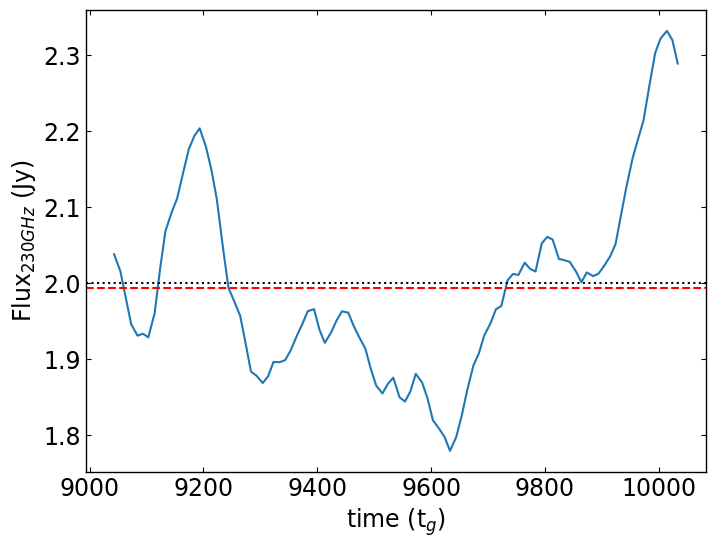

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [20]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

99:: 2.037993 Jy at 9043.128728
100:: 2.015427 Jy at 9054.201523
101:: 1.980448 Jy at 9063.696043
102:: 1.945836 Jy at 9073.192538
103:: 1.930780 Jy at 9084.269539
104:: 1.933284 Jy at 9093.760862
105:: 1.928506 Jy at 9103.246526
106:: 1.960216 Jy at 9114.319883
107:: 2.018165 Jy at 9123.813554
108:: 2.068321 Jy at 9133.307034
109:: 2.093609 Jy at 9144.385666
110:: 2.111420 Jy at 9153.878107
111:: 2.142106 Jy at 9163.373690
112:: 2.176590 Jy at 9174.454441
113:: 2.193603 Jy at 9183.942361
114:: 2.203846 Jy at 9193.435967
115:: 2.179512 Jy at 9204.508599
116:: 2.149487 Jy at 9213.993390
117:: 2.110815 Jy at 9223.488971
118:: 2.045574 Jy at 9234.553237
119:: 1.993755 Jy at 9244.039795
120:: 1.977101 Jy at 9253.531163
121:: 1.956948 Jy at 9264.605898
122:: 1.920822 Jy at 9274.096017
123:: 1.883420 Jy at 9283.585796
124:: 1.878135 Jy at 9293.077161
125:: 1.868331 Jy at 9304.150408
126:: 1.877224 Jy at 9313.640685
127:: 1.896084 Jy at 9323.132694
128:: 1.895800 Jy at 9334.206852
129:: 1.898

## Rhigh = 40

In [21]:
ind,time,z_tot,dscale = bhoss_avg(40, 10, "SANEA93", ifreq=2)

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_SA93/Rh40/inc10/BHOSS_CODE
ifreq=2: Should be checked if it is the correct freqency.
99, flux: 2.389841 at 9043.128728
100, flux: 2.355490 at 9054.201523
101, flux: 2.319000 at 9063.696043
102, flux: 2.358290 at 9073.192538
103, flux: 2.455806 at 9084.269539
104, flux: 2.426576 at 9093.760862
105, flux: 2.458664 at 9103.246526
106, flux: 2.346997 at 9114.319883
107, flux: 2.305616 at 9123.813554
108, flux: 2.317385 at 9133.307034
109, flux: 2.357556 at 9144.385666
110, flux: 2.341926 at 9153.878107
111, flux: 2.354742 at 9163.373690
112, flux: 2.310191 at 9174.454441
113, flux: 2.305140 at 9183.942361
114, flux: 2.234900 at 9193.435967
115, flux: 2.174718 at 9204.508599
116, flux: 2.149747 at 9213.993390
117, flux: 2.177653 at 9223.488971
118, flux: 2.191126 at 9234.553237
119, flux: 2.178743 at 9244.039795
120, flux: 2.211871 at 9253.531163
121, flux: 2.242721 at 9264.605898
122, flux: 2.178780 at 9274.096017
123, flux: 2.10084

In [22]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_SA93/Rh40/inc10/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [23]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_SA93/Rh40/inc10/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 99/198/100
average z_tot = 2.091490 Jy, the density scale = 1.000000e-16


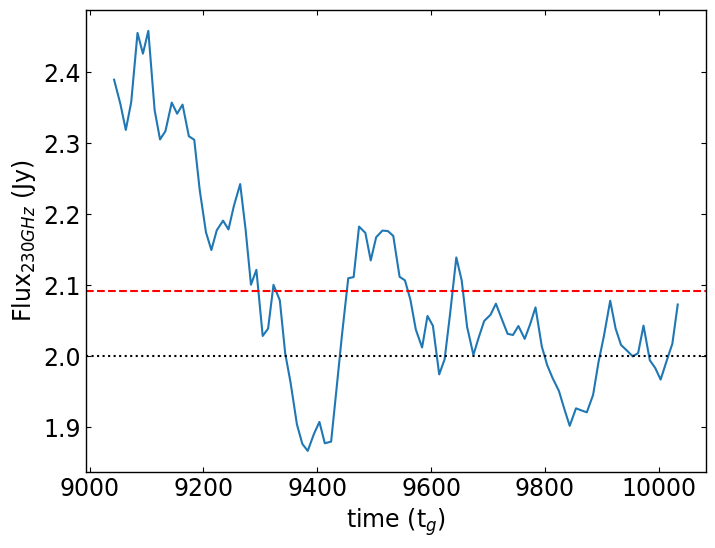

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [25]:
ind,time,z_tot,dscale = bhoss_avg(40, 50, "SANEA93",ifreq=2)

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_SA93/Rh40/inc50/BHOSS_CODE
ifreq=2: Should be checked if it is the correct freqency.
99, flux: 2.267320 at 9043.128728
100, flux: 2.223359 at 9054.201523
101, flux: 2.180503 at 9063.696043
102, flux: 2.256035 at 9073.192538
103, flux: 2.409603 at 9084.269539
104, flux: 2.396557 at 9093.760862
105, flux: 2.302719 at 9103.246526
106, flux: 2.230952 at 9114.319883
107, flux: 2.230966 at 9123.813554
108, flux: 2.224580 at 9133.307034
109, flux: 2.293729 at 9144.385666
110, flux: 2.315187 at 9153.878107
111, flux: 2.300663 at 9163.373690
112, flux: 2.248298 at 9174.454441
113, flux: 2.263114 at 9183.942361
114, flux: 2.197185 at 9193.435967
115, flux: 2.234110 at 9204.508599
116, flux: 2.253406 at 9213.993390
117, flux: 2.252634 at 9223.488971
118, flux: 2.193938 at 9234.553237
119, flux: 2.093055 at 9244.039795
120, flux: 2.032476 at 9253.531163
121, flux: 2.050045 at 9264.605898
122, flux: 2.043488 at 9274.096017
123, flux: 1.96859

In [26]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_SA93/Rh40/inc50/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [27]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_SA93/Rh40/inc50/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 99/198/100
average z_tot = 1.983734 Jy, the density scale = 1.220000e-16


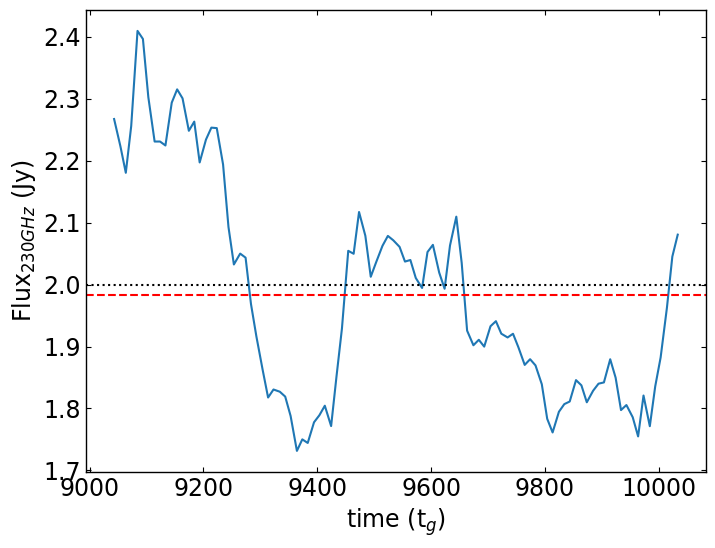

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [29]:
ind,time,z_tot,dscale = bhoss_avg(40, 90, "SANEA93", ifreq=2)

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_SA93/Rh40/inc90/BHOSS_CODE
ifreq=2: Should be checked if it is the correct freqency.
99, flux: 2.284946 at 9043.128728
100, flux: 2.298549 at 9054.201523
101, flux: 2.287610 at 9063.696043
102, flux: 2.366099 at 9073.192538
103, flux: 2.502993 at 9084.269539
104, flux: 2.505191 at 9093.760862
105, flux: 2.428800 at 9103.246526
106, flux: 2.364711 at 9114.319883
107, flux: 2.383377 at 9123.813554
108, flux: 2.318481 at 9133.307034
109, flux: 2.345625 at 9144.385666
110, flux: 2.348757 at 9153.878107
111, flux: 2.307060 at 9163.373690
112, flux: 2.246747 at 9174.454441
113, flux: 2.284642 at 9183.942361
114, flux: 2.275480 at 9193.435967
115, flux: 2.325291 at 9204.508599
116, flux: 2.336625 at 9213.993390
117, flux: 2.321311 at 9223.488971
118, flux: 2.167498 at 9234.553237
119, flux: 2.049966 at 9244.039795
120, flux: 2.001614 at 9253.531163
121, flux: 2.013136 at 9264.605898
122, flux: 1.937052 at 9274.096017
123, flux: 1.82157

In [30]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_SA93/Rh40/inc90/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [31]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_SA93/Rh40/inc90/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 99/198/100
average z_tot = 2.002571 Jy, the density scale = 1.250000e-16


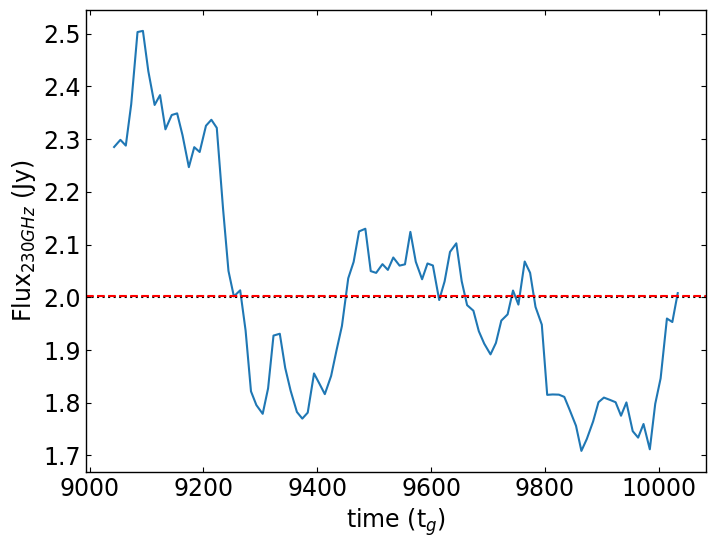

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

## Rhigh = 160

In [33]:
ind,time,z_tot,dscale = bhoss_avg(160, 10, "SANEA93", ifreq=2)

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_SA93/Rh160/inc10/BHOSS_CODE
ifreq=2: Should be checked if it is the correct freqency.
99, flux: 2.501044 at 9043.128728
100, flux: 2.423941 at 9054.201523
101, flux: 2.398586 at 9063.696043
102, flux: 2.472303 at 9073.192538
103, flux: 2.539113 at 9084.269539
104, flux: 2.538205 at 9093.760862
105, flux: 2.474702 at 9103.246526
106, flux: 2.459327 at 9114.319883
107, flux: 2.340617 at 9123.813554
108, flux: 2.349399 at 9133.307034
109, flux: 2.470891 at 9144.385666
110, flux: 2.367681 at 9153.878107
111, flux: 2.280926 at 9163.373690
112, flux: 2.271894 at 9174.454441
113, flux: 2.295447 at 9183.942361
114, flux: 2.270030 at 9193.435967
115, flux: 2.231155 at 9204.508599
116, flux: 2.162853 at 9213.993390
117, flux: 2.091890 at 9223.488971
118, flux: 2.167856 at 9234.553237
119, flux: 2.167048 at 9244.039795
120, flux: 2.135176 at 9253.531163
121, flux: 2.039230 at 9264.605898
122, flux: 1.936167 at 9274.096017
123, flux: 1.9305

In [34]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_SA93/Rh160/inc10/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [35]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_SA93/Rh160/inc10/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 99/198/100
average z_tot = 2.060958 Jy, the density scale = 2.100000e-16


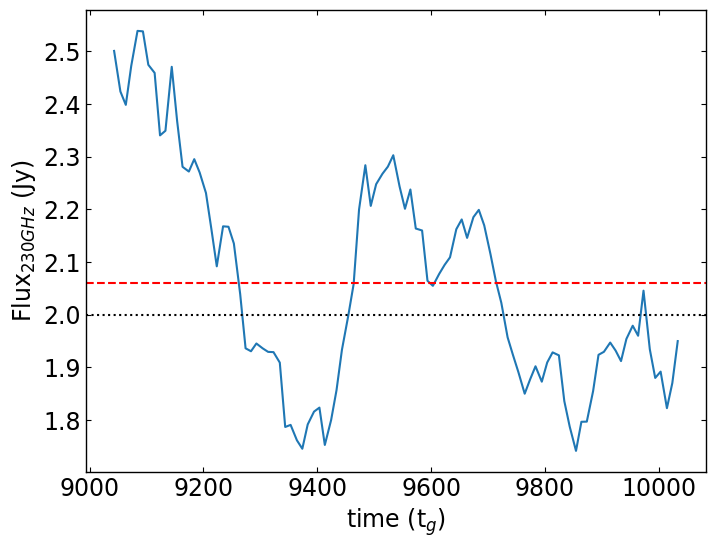

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [37]:
ind,time,z_tot,dscale = bhoss_avg(160, 50, "SANEA93", ifreq=2)

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_SA93/Rh160/inc50/BHOSS_CODE
ifreq=2: Should be checked if it is the correct freqency.
99, flux: 2.551879 at 9043.128728
100, flux: 2.513796 at 9054.201523
101, flux: 2.447341 at 9063.696043
102, flux: 2.538666 at 9073.192538
103, flux: 2.641047 at 9084.269539
104, flux: 2.667609 at 9093.760862
105, flux: 2.647575 at 9103.246526
106, flux: 2.621823 at 9114.319883
107, flux: 2.450505 at 9123.813554
108, flux: 2.441904 at 9133.307034
109, flux: 2.577835 at 9144.385666
110, flux: 2.492067 at 9153.878107
111, flux: 2.433303 at 9163.373690
112, flux: 2.433101 at 9174.454441
113, flux: 2.400979 at 9183.942361
114, flux: 2.401765 at 9193.435967
115, flux: 2.393598 at 9204.508599
116, flux: 2.284147 at 9213.993390
117, flux: 2.178392 at 9223.488971
118, flux: 2.271037 at 9234.553237
119, flux: 2.260306 at 9244.039795
120, flux: 2.142706 at 9253.531163
121, flux: 1.967429 at 9264.605898
122, flux: 1.806923 at 9274.096017
123, flux: 1.7632

In [38]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_SA93/Rh160/inc50/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [39]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_SA93/Rh160/inc50/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 99/198/100
average z_tot = 2.045454 Jy, the density scale = 2.950000e-16


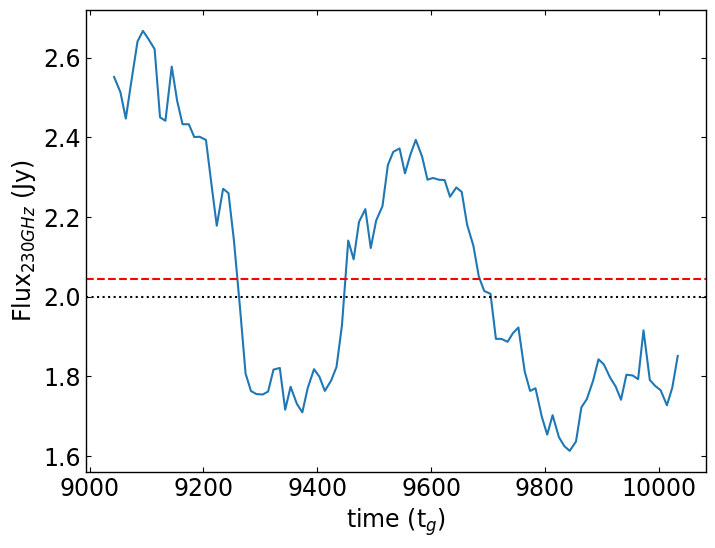

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [41]:
ind,time,z_tot,dscale = bhoss_avg(160, 90, "SANEA93", ifreq=2)

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_SA93/Rh160/inc90/BHOSS_CODE
ifreq=2: Should be checked if it is the correct freqency.
99, flux: 2.471847 at 9043.128728
100, flux: 2.480909 at 9054.201523
101, flux: 2.461431 at 9063.696043
102, flux: 2.630804 at 9073.192538
103, flux: 2.873215 at 9084.269539
104, flux: 2.861226 at 9093.760862
105, flux: 2.846123 at 9103.246526
106, flux: 2.766782 at 9114.319883
107, flux: 2.654697 at 9123.813554
108, flux: 2.585215 at 9133.307034
109, flux: 2.595050 at 9144.385666
110, flux: 2.535152 at 9153.878107
111, flux: 2.503996 at 9163.373690
112, flux: 2.450815 at 9174.454441
113, flux: 2.417671 at 9183.942361
114, flux: 2.456445 at 9193.435967
115, flux: 2.365396 at 9204.508599
116, flux: 2.283411 at 9213.993390
117, flux: 2.172021 at 9223.488971
118, flux: 2.087146 at 9234.553237
119, flux: 2.071724 at 9244.039795
120, flux: 1.994651 at 9253.531163
121, flux: 1.845101 at 9264.605898
122, flux: 1.789984 at 9274.096017
123, flux: 1.7134

In [42]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_SA93/Rh160/inc90/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [43]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_SA93/Rh160/inc90/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 99/198/100
average z_tot = 2.067270 Jy, the density scale = 3.170000e-16


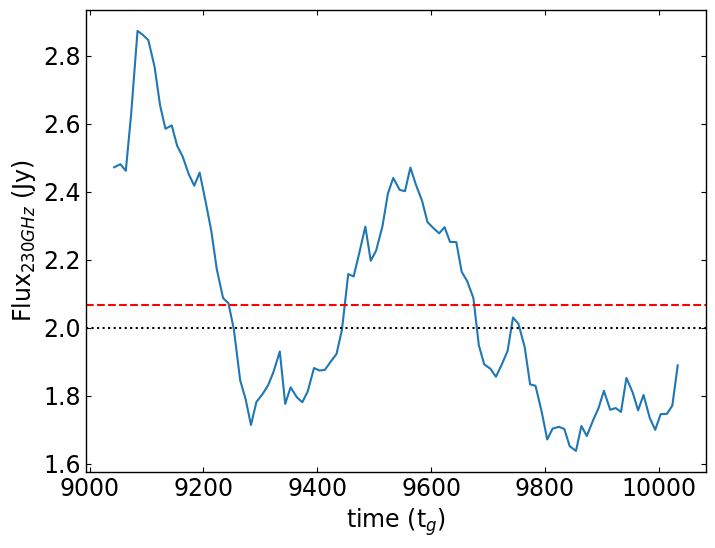

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))